In [1]:
import pandas as pd

VISA = '/kaggle/input/visa-stock-data-2024/visa_stocks.csv'

df = pd.read_csv(filepath_or_buffer=VISA, parse_dates=['Date']).drop(columns=['Open', 'High', 'Low', 'Close'])
df['year'] = df['Date'].dt.year
df['dollars'] = df['Adj Close'] * df['Volume']
df.head()

,Date,Adj Close,Volume,year,dollars
0,2008-03-19,12.579995,708486000,2008,8.912750e+09
1,2008-03-20,14.327834,198985200,2008,2.851027e+09
2,2008-03-24,13.299167,149566400,2008,1.989108e+09
3,2008-03-25,14.082910,87092000,2008,1.226509e+09
4,2008-03-26,14.240999,43111600,2008,6.139523e+08


Let's start with a plot of the price over time; we have five price series to choose from; we choose to plot the adjusted close because it includes stock splits and dividends. For clarity/brevity we're going to drop the other price columns. We're also going to approximate the quantity of dollars traded each trading day by multiplying the price by the volume.

<Axes: xlabel='Date', ylabel='Adj Close'>

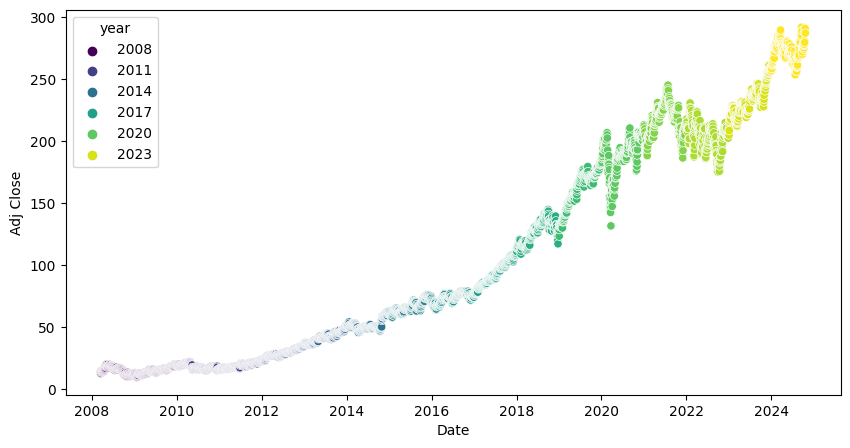

In [2]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

fig, ax = plt.subplots(figsize=(10, 5))

scatterplot(ax=ax, data=df, x='Date', y='Adj Close', hue='year', palette='viridis')

We can see the more recent end volatility pretty clearly, but price movement in the early years is hard to see. Let's use a log plot to see volatility in the early years when the adjusted price is low.

<Axes: xlabel='Date', ylabel='Adj Close'>

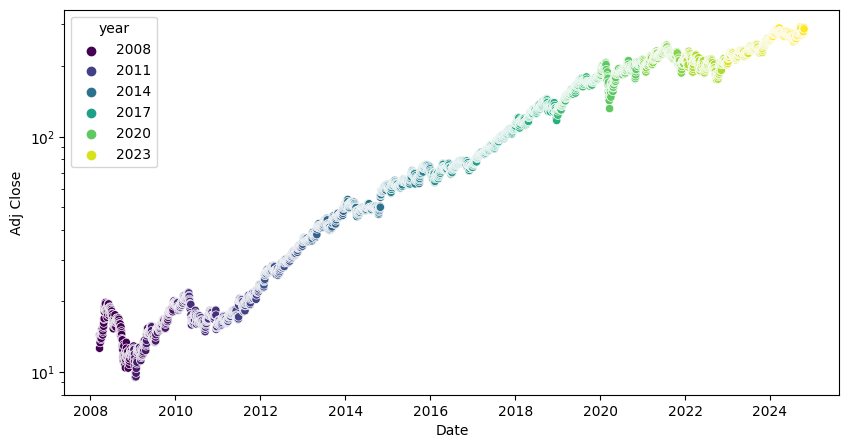

In [3]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

fig, ax = plt.subplots(figsize=(10, 5))
plt.yscale('log')

scatterplot(ax=ax, data=df, x='Date', y='Adj Close', hue='year', palette='viridis')

Let's take a look at the volatility over time; because there are some very large-volume trading days early we use a log plot again.

<Axes: xlabel='Date', ylabel='Volume'>

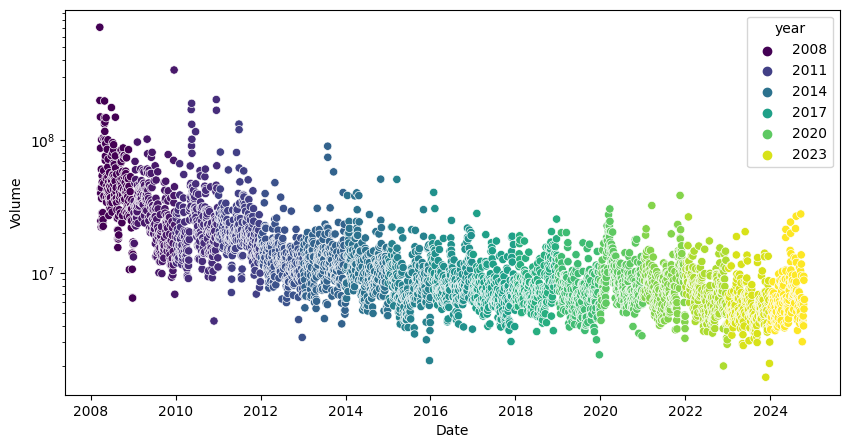

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.yscale('log')
scatterplot(ax=ax, data=df, x='Date', y='Volume', hue='year', palette='viridis')

What do we see? We see that volume has declined over time, as the price has risen.

Now let's look at the dollars quantity we calculated above.

<Axes: xlabel='Date', ylabel='dollars'>

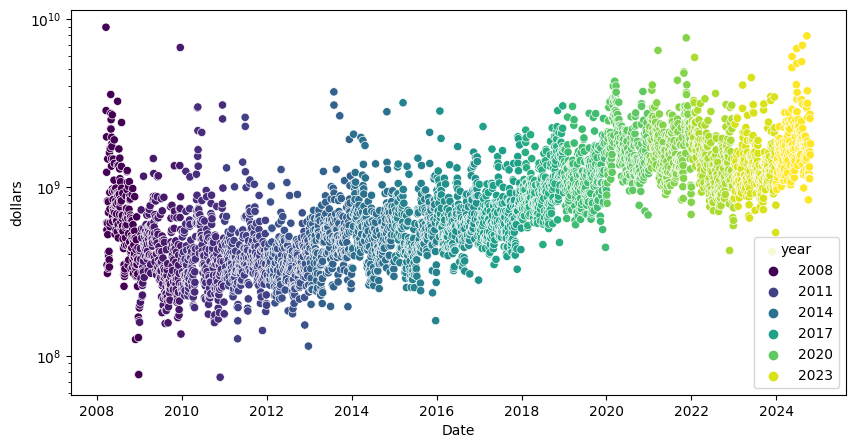

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.yscale('log')
scatterplot(ax=ax, data=df, x='Date', y='dollars', hue='year', palette='viridis')

What do we see? We see that in general, Visa daily dollar volume over the period 2008-2010 and grew steadily over the period 2010-2022, and has no clear trend since then.

Would we expect to see that price drives volume or vice versa?

In [6]:
df[['Adj Close', 'Volume']].corr()

,Adj Close,Volume
Adj Close,1.000000,-0.357483
Volume,-0.357483,1.000000


This tells us that they are somewhat negatively correlated, meaning that as price rises, we would expect volume to decline. What does that look like in daily terms?

<Axes: xlabel='Volume', ylabel='Adj Close'>

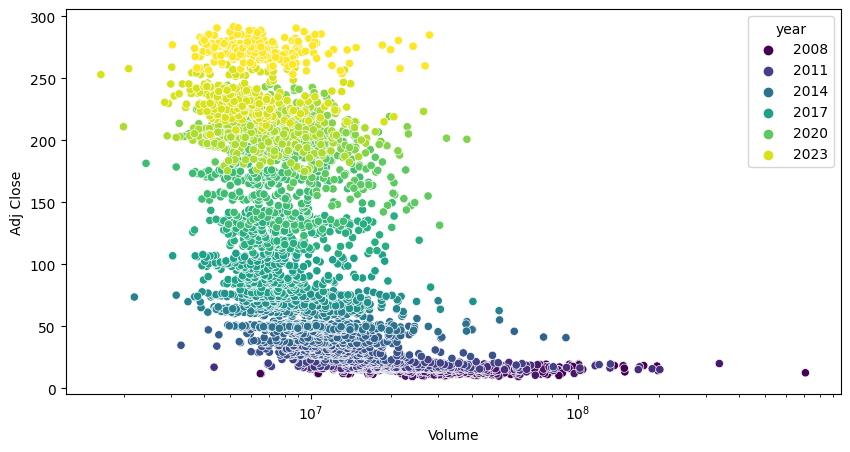

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.xscale('log')
scatterplot(ax=ax, data=df, x='Volume', y='Adj Close', hue='year', palette='viridis')

We can see that price has risen as volume has declined; but we suspect the causal arrow runs the other way.

<Axes: xlabel='Adj Close', ylabel='Volume'>

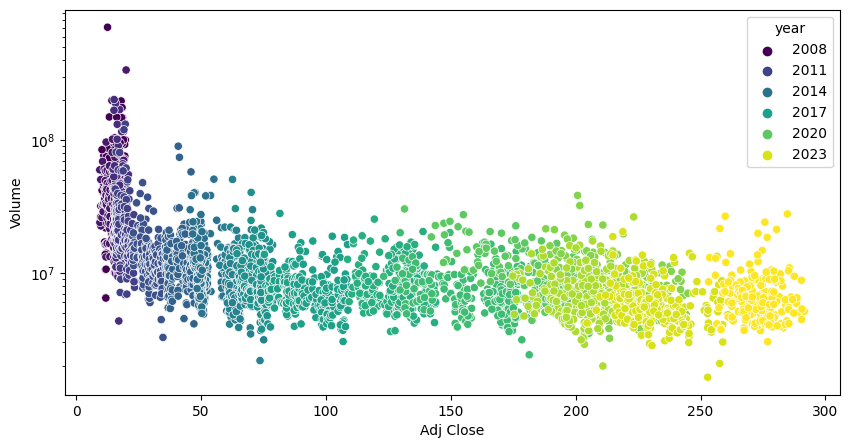

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.yscale('log')
scatterplot(ax=ax, data=df, x='Adj Close', y='Volume', hue='year', palette='viridis')

This is probably a more accurate representation of what we actually see: over time the higher price causes volume to decline; this is probably because investable capital is limited.